In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_pickle("dol_feature")
df.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,...,feature 506,feature 507,feature 508,feature 509,feature 510,feature 511,feature 512,feature 513,target,id(in whistle_time.csv file)
0,0.002335,0.001528,0.000376,0.000277,0.000266,0.000333,0.000568,0.000363,0.000654,0.000657,...,0.000019,0.000011,0.000008,0.000032,0.000043,0.000034,0.000034,0.000035,1.0,0.0
1,0.001655,0.000828,0.000371,0.000259,0.000084,0.000225,0.000252,0.000195,0.000338,0.000440,...,0.000033,0.000051,0.000040,0.000053,0.000039,0.000018,0.000032,0.000053,1.0,0.0
2,0.000401,0.000588,0.000240,0.000400,0.000231,0.000103,0.000306,0.000377,0.000214,0.000234,...,0.000031,0.000016,0.000016,0.000022,0.000011,0.000013,0.000012,0.000004,1.0,0.0
3,0.000997,0.000663,0.000363,0.001196,0.000887,0.000140,0.000559,0.000732,0.000419,0.001036,...,0.000046,0.000031,0.000026,0.000053,0.000036,0.000009,0.000013,0.000024,1.0,0.0
4,0.001638,0.001067,0.000291,0.000091,0.000134,0.000125,0.000531,0.000638,0.000332,0.000423,...,0.000027,0.000009,0.000035,0.000022,0.000022,0.000020,0.000058,0.000036,1.0,0.0


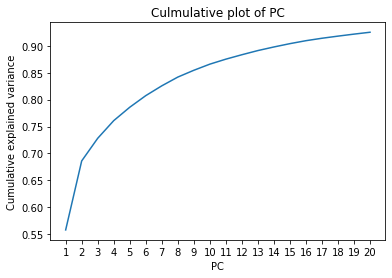

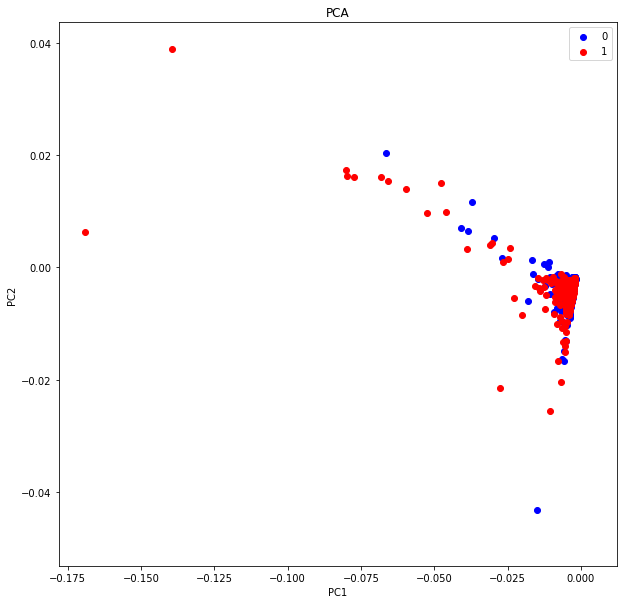

In [43]:
feature_col = ["feature {}".format(i) for i in range(1,514)]
# df_X = df[feature_col]

# for col in feature_col:
#     df_X[col] = (df_X[col]-df_X[col].mean())/df_X[col].std()
X = df[feature_col].values
R = X.T @ X/(X.shape[0]-1)
eig_value, eig_vector = np.linalg.eig(R)
cumsum = np.cumsum(eig_value)/np.sum(eig_value)
fig, ax = plt.subplots()
ax.set_title("Culmulative plot of PC")
ax.set_xlabel("PC")
ax.set_ylabel("Cumulative explained variance")
ax.plot(range(1,21),cumsum[:20])
ax.set_xticks(range(1,21))
Z = X @ eig_vector[:,:2]
color = ["blue", "red"]
fig, ax = plt.subplots(figsize=(10,10))
for i in range(2):
    xi = [Z[count,0] for count, j in enumerate(df["target"].to_list()) if j==i]
    yi = [Z[count,1] for count, j in enumerate(df["target"].to_list()) if j==i]
    ax.scatter(xi,yi,c=color[i],label=i)
ax.set_title("PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()

/home/yong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


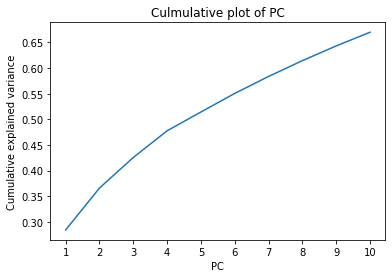

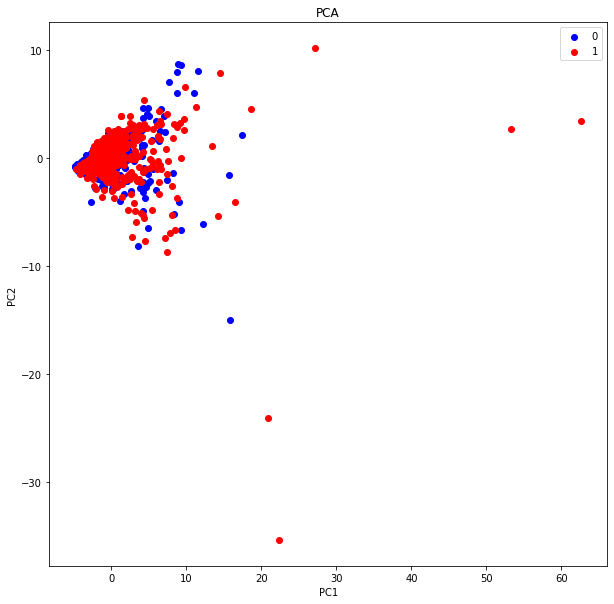

In [36]:
col_3_8 = ["feature {}".format(i) for i in range(33,88)]
df_X = df[col_3_8]

for col in col_3_8:
    df_X[col] = (df_X[col]-df_X[col].mean())/df_X[col].std()

X = df_X[col_3_8].values
R = X.T @ X/(X.shape[0]-1)
eig_value, eig_vector = np.linalg.eig(R)
cumsum = np.cumsum(eig_value)/np.sum(eig_value)
fig, ax = plt.subplots()
ax.set_title("Culmulative plot of PC")
ax.set_xlabel("PC")
ax.set_ylabel("Cumulative explained variance")
ax.plot(range(1,11),cumsum[:10])
ax.set_xticks(range(1,11))
Z = X @ eig_vector[:,:2]
color = ["blue", "red"]
fig, ax = plt.subplots(figsize=(10,10))
for i in range(2):
    xi = [Z[count,0] for count, j in enumerate(df["target"].to_list()) if j==i]
    yi = [Z[count,1] for count, j in enumerate(df["target"].to_list()) if j==i]
    ax.scatter(xi,yi,c=color[i],label=i)
ax.set_title("PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()